# Μπύρες & Ζυθοποιεία

##  Εισάγετε τις βιβλιοθήκες που θα χρειαστείτε

In [2]:
import pandas as pd
%matplotlib inline

## Εισάγετε το αρχείο `craftcans.csv`, από τον φάκελο data και κοιτάξτε τις πρώτες γραμμές

**βοήθεια** οι κενές γραμμές, δηλαδή οι τιμές NaN του συγκεκριμένου αρχείου είναι na_values = ["???", "Unknown", "UNKNOWN"]

In [4]:
df= pd.read_csv("../craftcans.csv", na_values = ["???", "Unknown", "UNKNOWN"])


## Πόσες γραμμές έχει το αρχείο? Τι τύπος είναι οι στήλες?

In [4]:
df.shape

(2416, 7)

In [5]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Ανάλυση ζυθοποιείων


## Ποιοι είναι οι top 10 παραγωγοί μπύρας?

In [10]:
df['Brewery'].value_counts(ascending = False)[0:9]

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Name: Brewery, dtype: int64

## Ποιο είναι το πιο κοινό μέγεθος μπύρας?


In [12]:
df['Size'].value_counts(ascending = False)

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
19.2 oz.               14
12 oz                  14
16 oz                  12
32 oz.                  5
24 oz. "Silo Can"       1
12 ounce                1
8.4 oz.                 1
19.2                    1
12 & 16 oz.             1
16.9 oz.                1
12 oz. Slimline         1
12 OZ.                  1
Name: Size, dtype: int64

## Ποιο είναι το πιο συνηθισμένο ποσοστό αλκοόλ (ABV -  alcohol by volume)?


In [13]:
df['ABV'].value_counts(ascending = False)

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.80%      66
5.60%      66
5.10%      62
5.30%      60
4.90%      59
6.20%      59
4.70%      57
8.00%      57
5.70%      52
6.80%      52
5.40%      50
7.50%      43
4.20%      38
6.30%      38
4.00%      38
7.20%      37
9.90%      35
5.90%      34
4.60%      32
6.90%      32
8.50%      26
6.70%      25
         ... 
4.10%       9
9.50%       9
8.30%       8
7.40%       8
7.90%       7
3.80%       6
3.50%       6
8.80%       6
9.60%       5
9.30%       5
9.70%       5
7.60%       5
8.60%       4
3.70%       4
8.10%       4
9.10%       3
3.20%       3
8.40%       3
9.80%       3
2.70%       2
8.90%       2
12.50%      1
3.40%       1
10.40%      1
9.40%       1
10.00%      1
12.00%      1
12.80%      1
2.80%       1
0.10%       1
Name: ABV, dtype: int64

## Όπως βλέπετε το ABV δεν είναι αριθμός. Μετατρέψτε το σε αριθμό. 

3 βήματα:

1. Επιλέξτε την στήλη ABV
2. Αφαιρέστε το σύμβολο % (**βοήθεια** μετατρέψτε το σε κενό)
3. Μετατρέψτε την στήλη τώρα σε `float`
4. Μπορείτε να την σώσετε με ένα νέο column ή στο ίδιο.  

Σε περίπτωση που όταν εισάγατε το αρχείο δεν ορίσατε ποια είναι τα κενά δεδομένα (nan) τότε ήρθε η ώρα να τα καθαρίσετε. 

In [31]:
df['ABV'].str.replace('%', '').astype(float)
df['ABVS'] = df['ABV'].str.replace('%', '').astype(float)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABVS
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0,4.9
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0,4.8
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0,6.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0,6.0


# Περιοχές


## Ποιες είναι οι top 10 πόλεις των ΗΠΑ σε παραγωγή μπύρας? 

In [34]:
df['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## Βρείτε όλα τα ζυθοποιεία στο Brooklyn, NY

In [6]:
#Με τον παρακάτω τρόπο μπορούμε να ζητήσουμε όσες γραμμές είναι ίσες με Brooklyn,
# και να μας δείξει και την στήλη που ψάχνουμε δίπλα βάζοντας την μέσα σε [ ]
df[df['Location'] == 'Brooklyn, NY']['Beer']

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## Ποιο ζυθοποιείο στο Brooklyn έχει τη μεγαλύτερη παραγωγή?

In [55]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## Ποια είναι τα 5 δημοφιλέστερα είδη μπύρας που παράγει η Sixpoint?

In [59]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5)

American IPA                      4
Cream Ale                         2
Rye Beer                          2
German Pilsener                   2
American Double / Imperial IPA    2
Name: Style, dtype: int64

## Βρείτε όλα τα ζυθοποιεία στην Νέα Υόρκη και μετά μετρήστε τα. 

In [68]:
NY = df[df['Location'].str.contains("NY", na=False)]
NY['Location'].value_counts()

Brooklyn, NY         38
Utica, NY            13
Patchogue, NY         4
Garrattsville, NY     4
New York, NY          3
Bronx, NY             3
Montauk, NY           2
Chatham, NY           2
Elmira, NY            2
Rochester, NY         1
Southampton, NY       1
Newburgh, NY          1
Name: Location, dtype: int64

# Μέτρηση πικράδας!  

Η μονάδα μέτρησης IBU σημαίνει [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), συνήθως οι ζυθοποιοί καμαρώνουν όταν έχουν πικρή μπύρα!


## Ποιος είναι ο μέσος όρος IBU σε όλες τις μπύρες?

In [71]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

## Φτάξτε ένα γράφημα διασποράς (histogram  στην python hist) για το IBU και όταν ορίσετε το ιστόγραμμα βάλτε  *30* bins αντί για το default που είναι 10

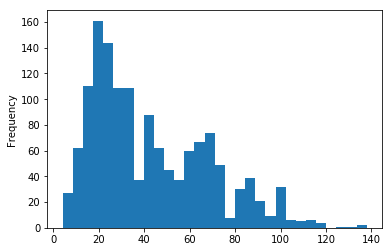

In [91]:
df['IBUs'].plot.hist(by="IBUs", bins= 30)

## Βρείτε όλες τις μπύρες που το IBU βρίσκεται στο 75ο εκατοστημόριο. 

**βοήθεια**: κάντε describe για να βρείτε το νούμερο

In [97]:
df[df['IBUs'] > 64.000000]['Beer']

6                          Citra Ass Down
7                          London Balling
14                            Rico Sauvin
17                           Pile of Face
21                             Excess IPL
22                         Hoponius Union
24                         Habitus (2014)
25                                  Solis
27                                Habitus
46                    Yeti Imperial Stout
59      98 Problems (Cuz A Hop Ain't One)
62                           Train Hopper
68                                   Csar
69                         Saucy Intruder
79                             The Gadget
89                             Gone A-Rye
93                          Heavy Lifting
110                               Jah Mon
123                        Flying Mouse 4
149                        Citra Ass Down
168                            Soul Doubt
170                          Bimini Twist
178                             Long Leaf
182                        Double 

## Βρείτε όλες τις μπύρες που το IBU βρίσκεται κάτω από το 25ο εκατοστημόριο.

In [96]:
df[df['IBUs'] < 21.000000]['Beer']

2                                   Wall's End
12                                    Sho'nuff
13                                 Bloody Show
18                              The Brown Note
19                                 House Lager
20                                Leisure Time
30                                        Park
31                                   Westfalia
32                                         KSA
54                                     Sparkle
56                                Hotbox Brown
57                                        Gold
66                                  Cafe Leche
67                      Damascene Apricot Sour
90                                 Sex Panther
102                             Vanilla Porter
105                                       Gose
106                            Vermont Pilsner
134                        Ginger Peach Saison
139                              Weissenheimer
144                      Passion Fruit Prussia
145          

## Βρείτε τη διάμεσο (median) του IBU για κάθε είδος μπύρας. Στην συνέχει φτιάξτε ένα γράφημα γιαυτό. 

Βάλτε τα μεγάλα στο επάνω μέρος, και τα nan στο τέλος. Για να είναι όμορφο το γράφημα δεν πρέπει να εμφανίζονται το ένα πάνω στο άλλο γιαυτό μεγαλώστε το μέγεθός του με το figsize=(2,15)

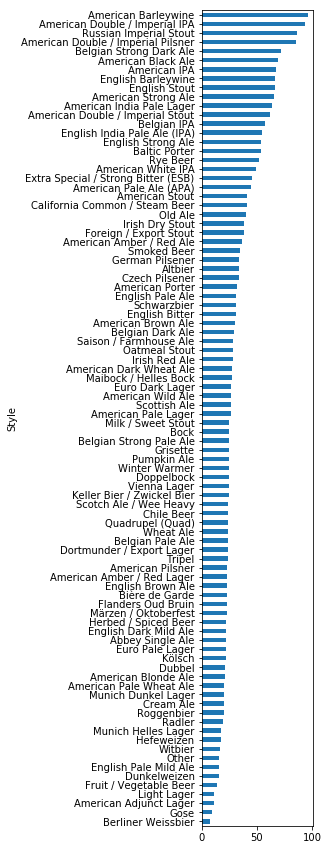

In [114]:
df.groupby('Style')['IBUs'].mean().dropna().sort_values(ascending=True).plot(kind = 'barh', figsize=(2,15))

## Βλέπουμε ότι υπάρχουν πολά είδη μπύρας, ποια είναι όμως τα 5 δημοφιλέστερα χαμηλά σε πικράδα και ποια τα υψηλά (high-IBU vs. low-IBU)?

Πρώτα βρείτε ποια έχουν high IBU, μετά βρείτε τα δημοφιλέστερα από αυτά και μετά πάρτε τα πρώτα 5. 

In [131]:
High = df[df['IBUs'] > 64.000000]

In [142]:
High['Style'].value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

## Βρείτε τον μέσο όρο IBU για τις μπύρες "Witbier", "Hefeweizen" και "American Pale Wheat Ale" και μετά φτιάξτε ένα ιστόγραμμα. 

Θέλουμε μόνο ένα γράφημα, που να δείχνει όλα τα παραπάνω! Και δοκιμάστε ξανά στο ιστόγραμμα να έχετε 20-30 bins.

In [232]:
beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
StyleNew = df[df['Style'].isin(beers)].dropna()

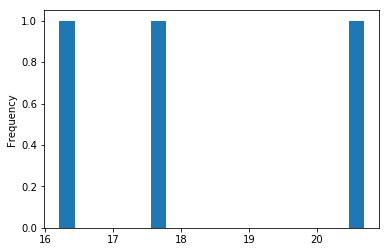

In [233]:
StyleNew.groupby('Style')['IBUs'].mean().plot.hist(by="IBUs", bins= 20)

## Βρείτε το μέσο όρο IBU για το είδος "IPA" και φτιάξτε ένα ιστόγραμμα.

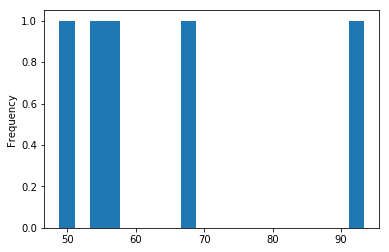

In [231]:
IPA = df[df['Style'].str.contains("IPA", na=False)].dropna()
IPA.groupby('Style')['IBUs'].mean().plot.hist(by="IBUs", bins= 20)

## Κάντε ένα γράφημα και με τα 2 παραπάνω ιστογράμματα.

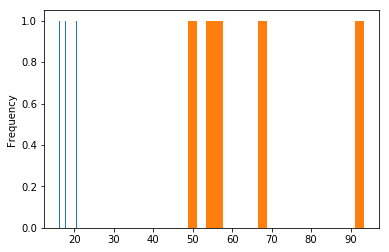

In [247]:
ax = StyleNew.groupby('Style')['IBUs'].mean().plot.hist(by="IBUs", bins= 20)
IPA.groupby('Style')['IBUs'].mean().plot.hist(by="IBUs", bins= 20,ax=ax)

## Συγκρίνετε το ABV από τις μπύρες που γίνονται από σιτάρι ( wheat ) σε σχέση με τις IPAs. Αν τα καταφέρετε, φτιάξτε και ένα γράφημα!

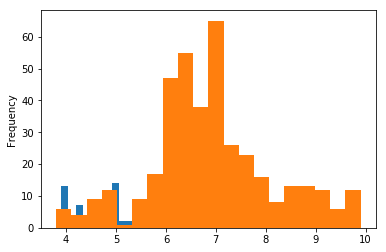

In [245]:
wheat = df[df['Style'].str.contains("Wheat", na=False)].dropna()
ax = wheat['ABVS'].plot.hist(by="ABVS", bins= 20)
IPA['ABVS'].plot.hist(by="ABVS", bins= 20,ax=ax)